Вибрати з інтернету два зображення з різною деталізацією об’єктів та два зображення
з різним контрастом. Без використання жодних бібліотек для обробки зображень
(наприклад Open CV), виконати відповідне завдання (номер завдання вказано у
рейтинговій таблиці)
1. Виконати 1D лінійну фільтрацію зображення з різними значеннми K i L. Провести
порівняльний аналіз
2. Виконати 2D лінійну фільтрацію зображення з різними значеннями ядра. Провести
порівняльний аналіз
3. Виконати box-фільтрацію зображення з різними значеннями ядра. Провести
порівняльний аналіз
4. Виконати медіанну фільтрацію зображення з різними значеннями ядра. Провести
порівняльний аналіз
5. Виконати фільтрацію Гауса з різними значеннями параметрами ядра розмиття.
Провести порівняльний аналіз
6. Виконати гістограмний зсув ліворуч(див. лекція No1). Провести порівняльний
аналіз
7. Виконати гістограмний зсув праворуч (див. лекція No1). Провести порівняльний
аналіз
8. Виконати гістограмне збільшення контрастності (див. лекція No1). Провести
порівняльний аналіз
9. Виконати гістограмне зменшення контрастності (див. лекція No1). Провести
порівняльний аналіз
10. Виконати гістограмне збільшення гамми (див. лекція No1). Провести порівняльний
аналіз
11. Виконати гістограмне зменшення гамми (див. лекція No1). Провести порівняльний
аналіз
12. Виконати детекцію границь на зображеннях за допомогою операторів Roberts,
Sobel. Провести порівняльний аналіз
13. Виконати детекцію границь на зображеннях за допомогою операторів Sobel,
Prewitt. Провести порівняльний аналіз.
14. Виконати детекцію границь на зображеннях за допомогою операторів Canny.
Провести порівняльний аналіз.
15. Виконати детекцію границь на зображеннях за допомогою операторів Kirsch,
Laplacian. Провести порівняльний аналіз.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
def display_images(img1 : np.ndarray, name1: str, img2: np.ndarray, name2: str):
    # Display the image using Matplotlib
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
    ax1.set_title(name1)
    ax1.axis('off')
    ax2.imshow(img2, cmap='gray')
    ax2.set_title(name2)
    ax2.axis('off')
    plt.show()

def display_image(img : np.ndarray, name: str):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB), cmap='gray')
    plt.axis('off')
    plt.show()

In [6]:
image_names = ["low_contrast.jpg", "low_detalisation.jpg", "high_detalisation.jpg", "high_contrast.jpg"]
images = [cv2.imread('/home/lavuna47/Projects/drone-ai/notebooks/images/' + img_str) for img_str in image_names]

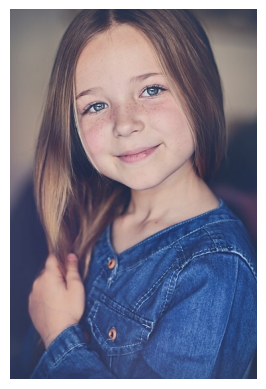

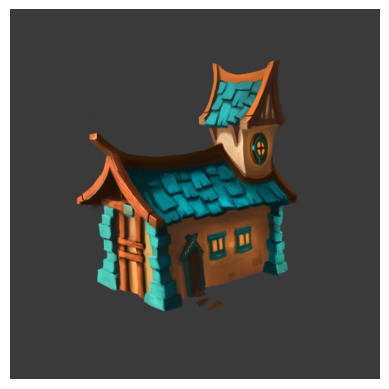

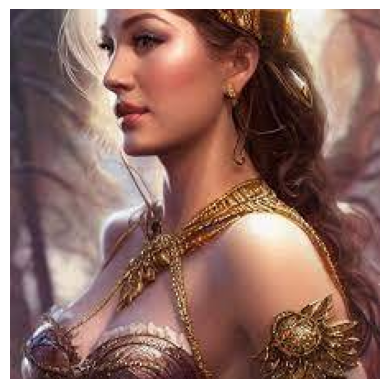

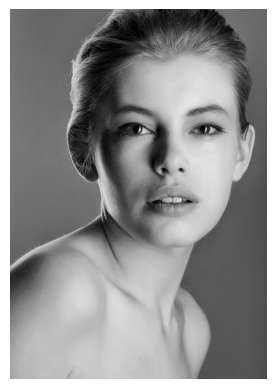

In [7]:
for img in images:
    display_image(img, "")

<h3> 1. Виконати 1D лінійну фільтрацію зображення з різними значеннми K i L. Провести
порівняльний аналіз </h3>

In [8]:
type(images[0])

numpy.ndarray

/tmp/ipykernel_5495/2481385949.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  img = np.asarray(img, dtype=np.float)
/tmp/ipykernel_5495/2481385949.py:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  return np.asarray(

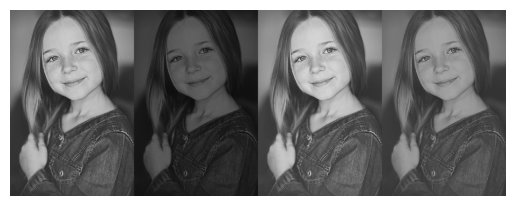

In [11]:
def linear_filter_1d(img: np.ndarray, K: float, L: int):
    img = np.asarray(img, dtype=np.float)
    img = img*K + L
    # clip pixel values
    img[img > 255] = 255
    img[img < 0] = 0
    return np.asarray(img, dtype = np.int)



img = images[0]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# k = 0.5, l = 0
out1 = linear_filter_1d(gray, 0.5, 0)
# k = 1., l = 10
out2 = linear_filter_1d(gray, 1., 10)
# k = 0.8, l = 15
out3 = linear_filter_1d(gray, 0.7, 25)
res = np.hstack([gray,out1, out2, out3])
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()

<b> Аналіз: зміна параметрів K та L впливає на контрастність зображення. Якщо K > 1, то контрастність збільшується, якщо K < 1, то контрастність зменшується. Якщо L > 0, то контрастність збільшується, якщо L < 0, то контрастність зменшується. </b>

<h3> 2. Виконати 2D лінійну фільтрацію зображення з різними значеннями ядра. Провести
порівняльний аналіз </h3>

In [ ]:
def filter_2d(image: np.array, kernel: np.array):
    """
    :param image: 2D array (Matrix) that represents image
    :param kernel: 2D array (Matrix) that represents filter
    :return: filtered image
    """
    image_height = image.shape[0]
    image_width = image.shape[1]
    kernel_height = kernel.shape[0]
    kernel_width = kernel.shape[1]
    image_out_height = image_height - kernel_height + 1
    image_out_width = image_width - kernel_width + 1
    image_out = np.zeros((image_out_height, image_out_width), dtype=np.int8)

    for i in range(image_out_height):
        for j in range(image_out_width):
            img_slice = image[i:i+kernel_width, j:j+kernel_height]
            new_array = img_slice * kernel
            val = np.sum(np.sum(new_array, axis=0))
            val = max(0, min(255, val))
            image_out[i, j] = val

    return image_out

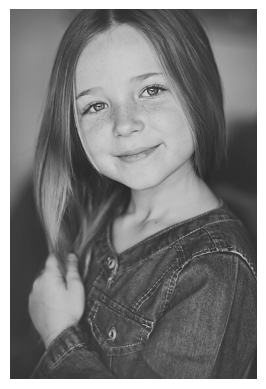

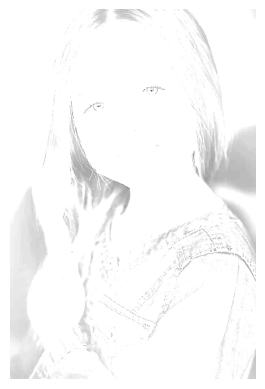

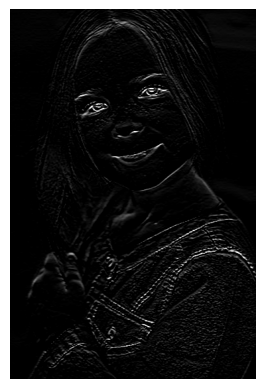

In [63]:
kernel1 = np.array([[0, 0, 0],
                   [0, 4, 0],
                   [0, 0, 0]], dtype=float)
kernel2 = np.array([[-1, -1, -1],
                   [0, 0, 0],
                   [1, 1, 1]], dtype=np.int8)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out1 = filter_2d(gray, kernel1)
out2 = filter_2d(gray, kernel2)

display_image(gray, "gray")
display_image(out1, "out1")
display_image(out2, "out2")


<b> Аналіз: 2D фільтрація може використовуватися для відсіювання лишньої інформації низького рівня(низько-рівневі фічі). У першій картинці було визначено точкові ключові точкі картинки(щоб це не означало) у другій - горизонтальні лінії</b>

<h3> 3. Виконати box-фільтрацію зображення з різними значеннями ядра. Провести
порівняльний аналіз </h3>

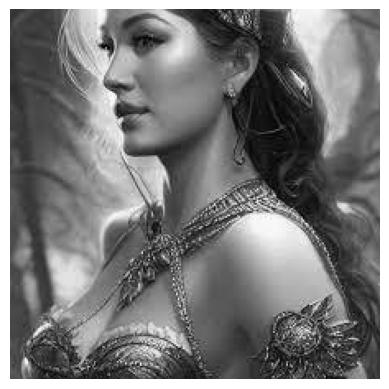

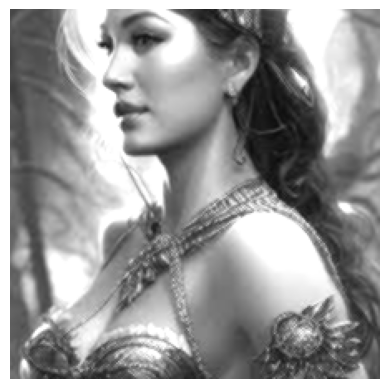

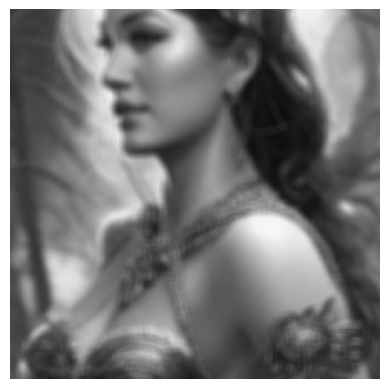

In [66]:
kernel1 = np.array([[1, 1, 1],
                   [1, 4, 1],
                   [1, 1, 1]], dtype=float) / 9
kernel2 = np.array([[1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1],
                   [1, 1, 1, 1, 1]], dtype=float) / 25.
gray = cv2.cvtColor(images[2], cv2.COLOR_BGR2GRAY)
out1 = filter_2d(gray, kernel1)
out2 = filter_2d(gray, kernel2)

display_image(gray, "gray")
display_image(out1, "out1")
display_image(out2, "out2")

<b> Аналіз: Можна побачити, що box-фільтрація впливає на розмиття картинки, при чому чим більша kernel-матриця - тим більше розмиття</b>

<h3> 4. Виконати медіанну фільтрацію зображення з різними значеннями ядра. Провести
порівняльний аналіз</h3>

In [67]:
def equalize_hist(image: np.array):
    # Check if the image is grayscale
    if len(image.shape) > 2:
        raise ValueError("Input image must be grayscale")

    # Calculate the histogram
    hist, _ = np.histogram(image.flatten(), 256, (0, 256))

    # Compute the cumulative distribution function (CDF)
    cdf = hist.cumsum()

    # Normalize the CDF to map pixel intensities from 0 to 255
    cdf_normalized = (cdf - cdf.min()) * 255 / (cdf.max() - cdf.min())

    # Replace the pixel intensities in the input image using the normalized CDF
    equalized_image = np.interp(image.flatten(), np.arange(256), cdf_normalized).reshape(image.shape)

    # Convert the result to uint8
    equalized_image = equalized_image.astype(np.uint8)

    return equalized_image

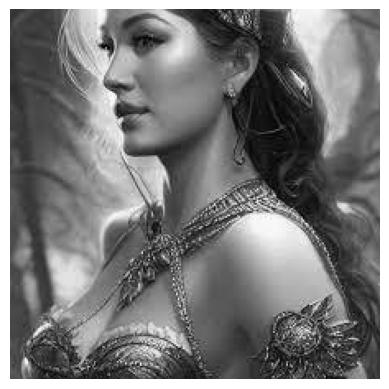

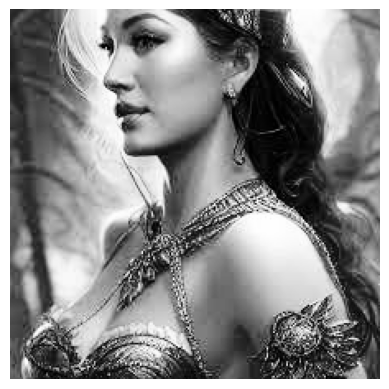

In [68]:
gray = cv2.cvtColor(images[2], cv2.COLOR_BGR2GRAY)
out = equalize_hist(gray)
display_image(gray, "gray")
display_image(out, "out")


<b> Аналіз: Бачимо, що для більш темні пікселі виглядають трохи темніше, а більш-світі - трохи світліше. Зміна контрасту є більш чітко-вираженою як у більш якісних зображеннях</b>

<h3> 5. Виконати фільтрацію Гауса з різними значеннями параметра ядра розмиття.
Провести порівняльний аналіз</h3>

In [71]:
def generate_gaussian_kernel(kernel_size, sigma):
    one_dim_kernel = cv2.getGaussianKernel(kernel_size, sigma)
    two_dim_kernel = np.outer(one_dim_kernel, one_dim_kernel)
    return two_dim_kernel


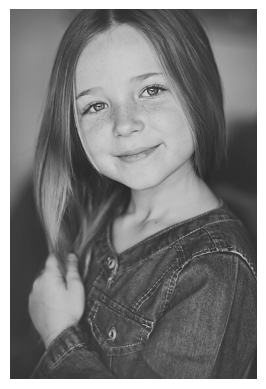

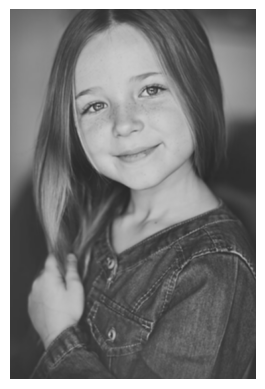

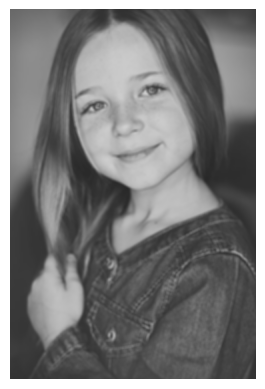

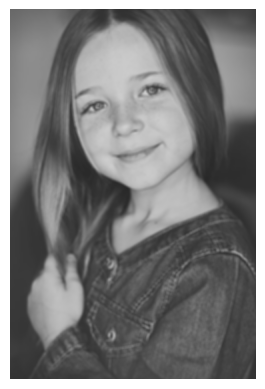

In [75]:
kernel1 = generate_gaussian_kernel(3, 1)
kernel2 = generate_gaussian_kernel(5, 2)
kernel3 = generate_gaussian_kernel(7, 3)

img = images[0]
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
out1 = filter_2d(gray, kernel1)
out2 = filter_2d(gray, kernel2)
out3 = filter_2d(gray, kernel3)
display_image(gray, "gray")
display_image(out1, "img1")
display_image(out2, "img2")
display_image(out2, "img3")


<b> Аналіз: Бачимо більш гладке згладжування по краях(лініях з великим контрастом) картинки</b>

<h3>
6. Виконати гістограмний зсув ліворуч(див. лекція No1). Провести порівняльний
аналіз </h3>
<h3>
7. Виконати гістограмний зсув праворуч (див. лекція No1). Провести порівняльний
аналіз
</h3>

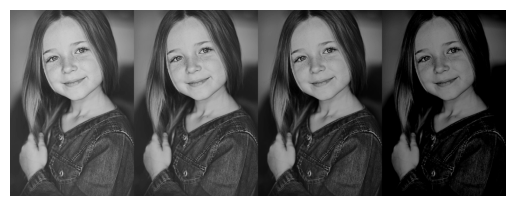

In [85]:
def shift_histogram(image: np.array, shift_value, direction: str):
    if direction == "left":
        shifted_image = np.maximum(image.astype(np.int16) - shift_value, 0).astype(np.uint8)
    elif direction == "right":
        shifted_image = np.maximum(image.astype(np.int16) + shift_value, 0).astype(np.uint8)
    else:
        raise ValueError("Invalid argument for direction!")
    return shifted_image

shifted_left_img1 = shift_histogram(gray, 10, "left")
shifted_left_img2 = shift_histogram(gray, 20, "left")
shifted_left_img3 = shift_histogram(gray, 40, "left")
shifted_left_img4 = shift_histogram(gray, 80, "left")

shifted_right_img1 = shift_histogram(gray, 10, "right")
shifted_right_img2 = shift_histogram(gray, 20, "right")
shifted_right_img3 = shift_histogram(gray, 40, "right")
shifted_right_img4 = shift_histogram(gray, 60, "right")

res = np.hstack([shifted_left_img1, shifted_left_img2, shifted_left_img3, shifted_left_img4])
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()

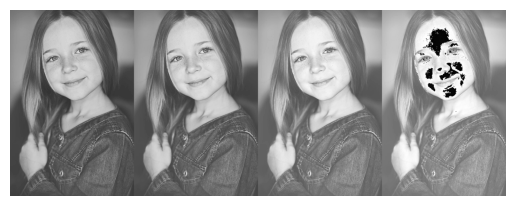

In [86]:
res = np.hstack([shifted_right_img1, shifted_right_img2, shifted_right_img3, shifted_right_img4])
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()

<b> Аналіз: Бачимо, що при зсуві вліво ми робимо зображення більш темним, а при зсуві вправо більш світлим. Також при зсуві на 60 одиниць вправо лице дівчинки стає трохи чорнішим.</b>

<h3> 8. Виконати гістограмне збільшення контрастності (див. лекція No1). Провести
порівняльний аналіз </h3>
<h3>
9. Виконати гістограмне зменшення контрастності (див. лекція No1). Провести
порівняльний аналіз
</h3>

In [87]:
def increase_contrast(image, new_min=0, new_max=255):
    current_min = np.min(image)
    current_max = np.max(image)
    contrast_image = ((image - current_min) * ((new_max - new_min) / (current_max - current_min)) + new_min).astype(np.uint8)
    return contrast_image
def decrease_contrast(image, new_min=50, new_max=205):
    current_min = np.min(image)
    current_max = np.max(image)
    contrast_image = ((image - current_min) * ((new_max - new_min) / (current_max - current_min)) + new_min).astype(np.uint8)
    return contrast_image


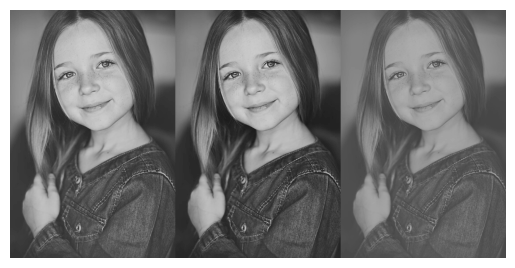

In [89]:
decreased_contrast_image1 = increase_contrast(gray)
increased_contrast_image2 = decrease_contrast(gray)
res = np.hstack([gray, decreased_contrast_image1, increased_contrast_image2])
plt.imshow(res, cmap='gray')
plt.axis('off')
plt.show()

<h3> Аналіз: Бачимо, що друга картинка має більш виражений контраст, а третя менш виражений контраст у порівнянні з першою</h3>

<h3> 10. Виконати гістограмне збільшення гамми (див. лекція No1). Провести порівняльний
аналіз </h3>
<h3> 11. Виконати гістограмне зменшення гамми (див. лекція No1). Провести порівняльний
аналіз</h3>

(-0.5, 1491.5, 559.5, -0.5)

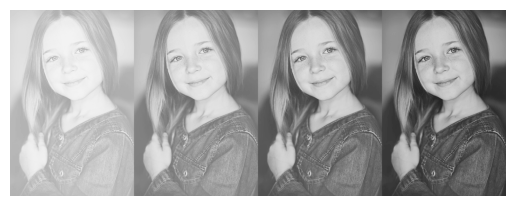

In [91]:
def adjust_gamma(image, gamma):
    normalized_image = image / 255.0
    gamma_corrected_image = np.power(normalized_image, gamma)
    output_image = (gamma_corrected_image * 255).astype(np.uint8)
    return output_image

gamma_corrected_image1 = adjust_gamma(gray, 0.2)
gamma_corrected_image2 = adjust_gamma(gray, 0.4)
gamma_corrected_image3 = adjust_gamma(gray, 0.6)
gamma_corrected_image4 = adjust_gamma(gray, 0.8)
res = np.hstack([gamma_corrected_image1, gamma_corrected_image2, gamma_corrected_image3, gamma_corrected_image4])
plt.imshow(res, cmap='gray')
plt.axis('off')

<b> Аналіз: Зі збільшенням гамми збільшується контраст картинки</b>

<h3> 12. Виконати детекцію границь на зображеннях за допомогою операторів Roberts,
Sobel. Провести порівняльний аналіз </h3>

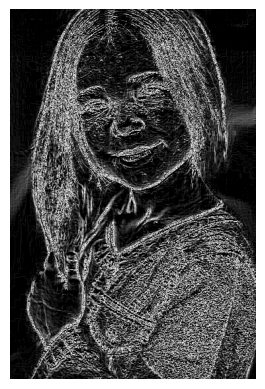

In [93]:
def apply_roberts_filter(image):
    """
    Фільтр Робертса - це оператор розпізнавання краю, який працює шляхом виявлення діагональних градієнтів інтенсивності пікселів. Фільтр Робертса використовує дві перехресні матриці згортки для отримання результатів градієнтів по обох діагоналях.
    """

    # Матриці згортки для фільтру Робертса
    kernel_diag1 = np.array([[1, 0],
                             [0, -1]])
    kernel_diag2 = np.array([[0, 1],
                             [-1, 0]])

    diag1 = filter_2d(image, kernel_diag1)
    diag2 = filter_2d(image, kernel_diag2)

    edge_image = np.sqrt(np.square(diag1) + np.square(diag2))
    edge_image = (edge_image / np.max(edge_image) * 255).astype(np.uint8)

    return edge_image

roberts_filtered_image = apply_roberts_filter(gray)

display_image(roberts_filtered_image, "roberts filter")

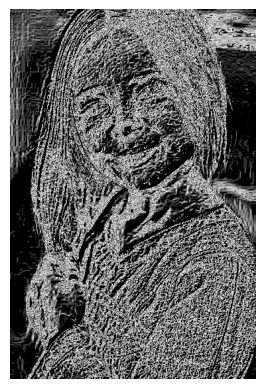

In [105]:
def apply_sobel_filter(image):
    """
    Фільтр Собеля - це оператор розпізнавання краю, який використовує дві перехресні матриці згортки для отримання результатів градієнтів по горизонталі та вертикалі.
    """
    # Матриці згортки для фільтра Собеля
    kernel_horizontal = np.array([[-1, 0, 1],
                                  [-2, 0, 2],
                                  [-1, 0, 1]])

    kernel_vertical = np.array([[-1, -2, -1],
                                [0, 0, 0],
                                [1, 2, 1]])

    # Застосування матриць згортки
    grad_x = filter_2d(image, kernel_horizontal)
    grad_y = filter_2d(image, kernel_vertical)

    # Об'єднання результатів
    edge_image = np.sqrt(np.square(grad_x) + np.square(grad_y))
    edge_image = (edge_image / np.max(edge_image) * 255).astype(np.uint8)

    return edge_image

sobel_filtered_image = apply_sobel_filter(gray)

display_image(sobel_filtered_image, "sobel filter")

<b> Аналіз: Фільтр Собеля дуже багато непотрібних фіч не фільтрує на відміну від філтра Робертса </b>

<h3> 13. Виконати детекцію границь на зображеннях за допомогою операторів Sobel,
Prewitt. Провести порівняльний аналіз. </h3>

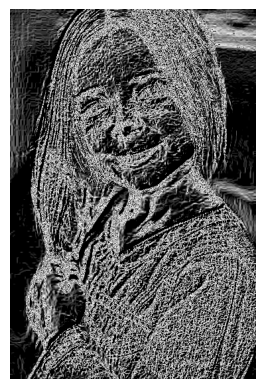

In [101]:
def apply_prewitt_filter(image):
    # Матриці згортки для детектора краю Превітта
    kernel_horizontal = np.array([[-1, 0, 1],
                                  [-1, 0, 1],
                                  [-1, 0, 1]])

    kernel_vertical = np.array([[-1, -1, -1],
                                [0, 0, 0],
                                [1, 1, 1]])

    # Застосування матриць згортки
    grad_x = filter_2d(image, kernel_horizontal)
    grad_y = filter_2d(image, kernel_vertical)

    # Об'єднання результатів
    edge_image = np.sqrt(np.square(grad_x) + np.square(grad_y))
    edge_image = (edge_image / np.max(edge_image) * 255).astype(np.uint8)
    return edge_image

prewitt_filtered_image = apply_prewitt_filter(gray)

display_image(prewitt_filtered_image, "prewitt filter")


<h3> 14. Виконати детекцію границь на зображеннях за допомогою операторів Canny.
Провести порівняльний аналіз. </h3>

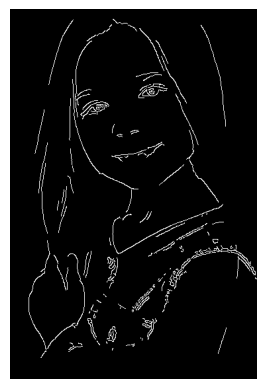

In [114]:
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), (size // 2), size)
    xx, yy = np.meshgrid(ax, ax)

    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)

def apply_gaussian_blur(image, kernel_size, sigma):
    # Verify if the image is grayscale
    if len(image.shape) > 2:
        raise ValueError("Input image must be grayscale")

    kernel = gaussian_kernel(kernel_size, sigma)
    return cv2.filter2D(image, -1, kernel)

def gradient(image):
    kernel_horizontal = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
    kernel_vertical = np.array([[-1, -2, -1], [0, 0, 0], [1, 2, 1]])

    grad_x = cv2.filter2D(image, -1, kernel_horizontal)
    grad_y = cv2.filter2D(image, -1, kernel_vertical)

    magnitude = np.sqrt(np.square(grad_x) + np.square(grad_y))
    angle = np.arctan2(grad_y, grad_x) * 180 / np.pi

    return magnitude, angle

def non_maximum_suppression(magnitude, angle):
    h, w = magnitude.shape
    suppressed = np.zeros((h, w), dtype=np.float32)

    angle = angle % 180
    quantized_angle = np.round(angle / 45) * 45

    for i in range(1, h - 1):
        for j in range(1, w - 1):
            q, r = 255, 255

            if 0 <= quantized_angle[i, j] < 22.5 or 157.5 <= quantized_angle[i, j] <= 180:
                q, r = magnitude[i, j - 1], magnitude[i, j + 1]
            elif 22.5 <= quantized_angle[i, j] < 67.5:
                q, r = magnitude[i - 1, j + 1], magnitude[i + 1, j - 1]
            elif 67.5 <= quantized_angle[i, j] < 112.5:
                q, r = magnitude[i - 1, j], magnitude[i + 1, j]
            elif 112.5 <= quantized_angle[i, j] < 157.5:
                q, r = magnitude[i - 1, j - 1], magnitude[i + 1, j + 1]

            if magnitude[i, j] >= q and magnitude[i, j] >= r:
                suppressed[i, j] = magnitude[i, j]

    return suppressed

def double_threshold(image, lower_ratio, upper_ratio, weak=100, strong=255):
    high_threshold = image.max() * upper_ratio
    low_threshold = high_threshold * lower_ratio

    output = np.zeros_like(image, dtype=np.uint8)
    weak_indices = np.where((image >= low_threshold) & (image <= high_threshold))
    strong_indices = np.where(image > high_threshold)

    output[weak_indices] = weak
    output[strong_indices] = strong

    return output

def hysteresis(image, weak=100, strong=255):
    h, w = image.shape
    for i in range(1, h - 1):
        for j in range(1, w - 1):
            if image[i, j] == weak:
                if np.any(image[i - 1:i + 2, j - 1:j + 2] == strong):
                    image[i, j] = strong
                else:
                    image[i, j] = 0

    return image

def canny(image, lower_threshold_ratio, upper_threshold_ratio, gaussian_blur_size=(5, 5)):
    blurred_image = apply_gaussian_blur(image, gaussian_blur_size, 0)
    magnitude, angle = gradient(blurred_image)
    suppressed = non_maximum_suppression(magnitude, angle)
    thresholded = double_threshold(suppressed, lower_threshold_ratio, upper_threshold_ratio)
    edge_image = hysteresis(thresholded)

    return edge_image

# Застосувати детектор краю Кенні
lower_threshold = 100
upper_threshold = 150
edge_image = canny(gray, lower_threshold, upper_threshold)
display_image(edge_image, "canny edge detection algo")

<h3> Аналіз: Детекція границь Кенні є більш складною та якіснішою, ніж попередні методи - Собеля, Превітта, Роберта</h3>

<h3> 15. Виконати детекцію границь на зображеннях за допомогою операторів Kirsch,
Laplacian. Провести порівняльний аналіз. <h3>

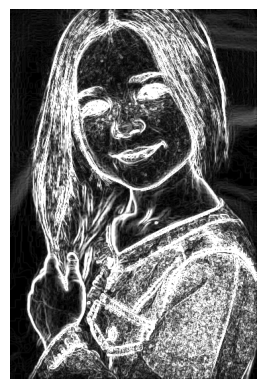

In [119]:
def apply_kirsch(image):
    kirsch_kernels = np.array([
        [[ 5,  5,  5], [-3,  0, -3], [-3, -3, -3]],
        [[ 5,  5, -3], [ 5,  0, -3], [-3, -3, -3]],
        [[ 5, -3, -3], [ 5,  0, -3], [ 5, -3, -3]],
        [[-3, -3, -3], [ 5,  0, -3], [ 5,  5, -3]],
        [[-3, -3, -3], [-3,  0, -3], [ 5,  5,  5]],
        [[-3, -3, -3], [-3,  0,  5], [-3,  5,  5]],
        [[-3, -3,  5], [-3,  0,  5], [-3, -3,  5]],
        [[-3,  5,  5], [-3,  0,  5], [-3, -3, -3]]
    ])

    edge_image = np.zeros_like(image, dtype=np.float32)

    for kernel in kirsch_kernels:
        edge_image = np.maximum(edge_image, cv2.filter2D(image, -1, kernel))

    return edge_image.astype(np.uint8)

kirsch_image = apply_kirsch(gray)
display_image(kirsch_image, "kirsch edge detection algo")

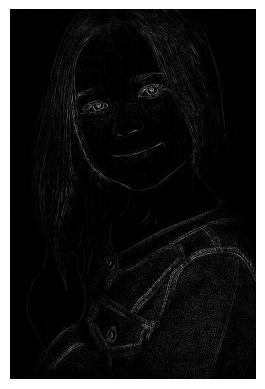

In [120]:

def apply_laplacian(image):
    laplacian_kernel = np.array([
        [0,  1, 0],
        [1, -4, 1],
        [0,  1, 0]
    ])

    edge_image = filter_2d(image, laplacian_kernel)
    return np.abs(edge_image).astype(np.uint8)

laplacian_image = apply_laplacian(gray)
display_image(laplacian_image, "laplacian edge detection algo")

<b> Аналіз: Алгоритм детекції границь Лапласа та Кірша відрізнаяються ступенем деталізації. У Кірша - більше деталей, у Лапласа менше</b>